In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("DATA/fake_reg.csv")

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


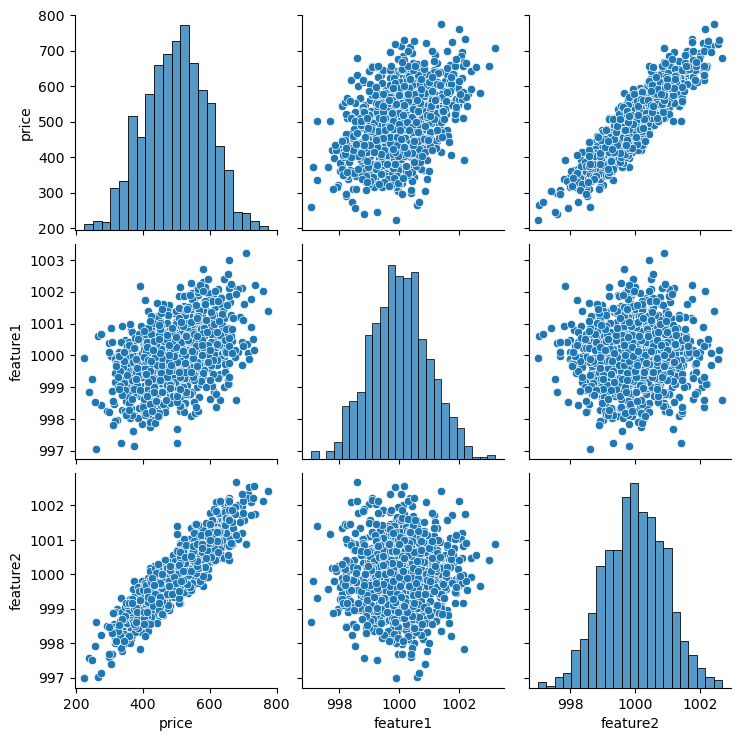

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[["feature1", "feature2"]].values

In [7]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [8]:
y = df["price"].values

In [9]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
X_train.shape

(700, 2)

In [14]:
X_test.shape

(300, 2)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  `MinMaxScaler` doesn't reduce the effect of outliers, but it linearly
 |  scales them down into a fixed range, where the largest occurring data point
 |  corresponds to the maximum value and the smallest one 

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(X_train)

MinMaxScaler()

In [19]:
X_train = scaler.transform(X_train)

In [20]:
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [21]:
X_test = scaler.transform(X_test)

In [22]:
X_test

array([[ 0.39533339,  0.38540671],
       [ 0.57300502,  0.74070924],
       [ 0.61294076,  0.65734264],
       [ 0.38169528,  0.73076311],
       [ 0.07776591,  0.46323644],
       [ 0.49421971,  0.68949258],
       [ 0.2065742 ,  0.70096247],
       [ 0.55141988,  0.41776773],
       [ 0.36812191,  0.69082394],
       [ 0.56465724,  0.3877465 ],
       [ 0.57048029,  0.71810824],
       [ 0.79569525,  0.47979901],
       [ 0.38488235,  0.41856516],
       [ 0.33142545,  0.42411972],
       [ 0.89361377,  0.63912775],
       [ 0.50191166,  0.39789174],
       [ 0.7159808 ,  0.43688384],
       [ 0.35812192,  0.92028225],
       [ 0.49989367,  0.85589311],
       [ 0.63965434,  0.59024789],
       [ 0.19053626,  0.34203634],
       [ 0.40982896,  0.45849208],
       [ 0.26844791,  0.40167269],
       [ 0.38649709,  0.33592759],
       [ 0.50654703,  0.65789843],
       [ 0.41260556,  0.79338075],
       [ 0.45631316,  0.61323307],
       [ 0.44064792,  0.40889315],
       [ 0.42963904,

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [24]:
help(Sequential)

Help on class Sequential in module keras.src.models.sequential:

class Sequential(keras.src.models.model.Model)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `Model`.
 |  
 |  Examples:
 |  
 |  ```python
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the initial `Input`.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = keras.Sequential()
 |  model.add(keras.layers.Dense(8))
 |  model.add(keras.layers.Dense(4))
 |  # model.weights not created yet
 |  
 |  # Whereas if you specify an `Input`, the model gets built
 |  # continuously as you are adding layers:
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |  len(model.weights)  # Returns "2"
 |  
 |  # When using the delayed-build 

In [25]:
help(Dense)

Help on class Dense in module keras.src.layers.core.dense:

class Dense(keras.src.layers.layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, lora_rank=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).

In [29]:
model = Sequential()

model.add(Input(shape=(2,)))

model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="rmsprop", loss="mse")

In [30]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 257606.4844   
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - loss: 259757.2344
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 256205.7188
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - loss: 251600.7500
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 257442.0156
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 254632.7500
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 251741.6250
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 258722.4375
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 255718.0000
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 256853.2344
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 256419.2969
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 251056.7812
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - loss: 255651.5938
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 850

In [32]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

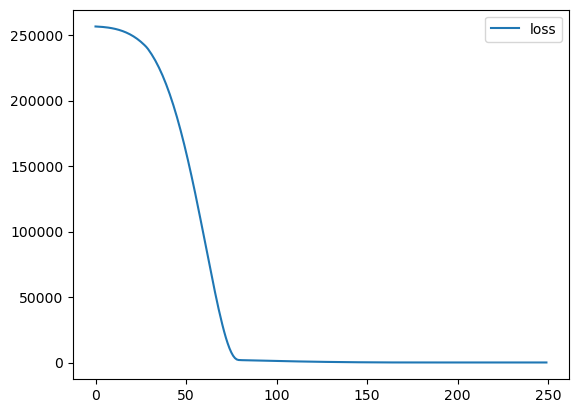

In [33]:
loss_df.plot()

In [34]:
model.evaluate(X_test,y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 26.9567


25.034664154052734

In [36]:
test_predictions = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step


In [37]:
test_predictions

array([[405.44913],
       [623.88525],
       [592.45807],
       [572.5109 ],
       [366.71024],
       [579.4823 ],
       [515.2739 ],
       [459.3259 ],
       [549.5109 ],
       [447.73077],
       [612.1223 ],
       [549.2603 ],
       [419.2687 ],
       [409.02463],
       [651.6453 ],
       [437.49533],
       [508.72696],
       [660.28046],
       [662.9506 ],
       [565.84686],
       [334.30966],
       [445.02515],
       [382.6541 ],
       [378.89334],
       [566.89014],
       [610.9099 ],
       [532.654  ],
       [428.04214],
       [655.7981 ],
       [414.2614 ],
       [442.8403 ],
       [485.3558 ],
       [438.60474],
       [682.2292 ],
       [424.95544],
       [417.84256],
       [502.20453],
       [550.7618 ],
       [509.9571 ],
       [395.4772 ],
       [618.94025],
       [416.80728],
       [604.7851 ],
       [446.17758],
       [502.23077],
       [582.0619 ],
       [669.4123 ],
       [490.64798],
       [318.67947],
       [485.65228],


In [42]:
pred_df = pd.DataFrame(test_predictions,columns=["Model Predictions"])

In [43]:
pred_df

,Model Predictions
0,405.449127
1,623.885254
2,592.458069
3,572.510925
4,366.710236
...,...
295,529.295410
296,515.198242
297,609.989136
298,417.139740


In [44]:
pred_df["Test True Y"] = y_test

In [45]:
pred_df

,Model Predictions,Test True Y
0,405.449127,402.296319
1,623.885254,624.156198
2,592.458069,582.455066
3,572.510925,578.588606
4,366.710236,371.224104
...,...,...
295,529.295410,525.704657
296,515.198242,502.909473
297,609.989136,612.727910
298,417.139740,417.569725


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

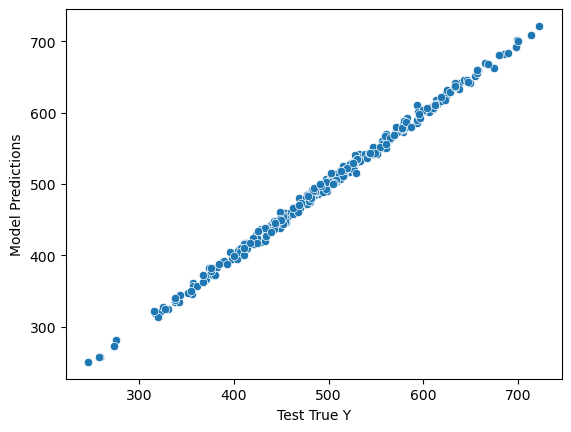

In [47]:
sns.scatterplot(data=pred_df,x="Test True Y",y="Model Predictions")

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [49]:
mean_absolute_error(pred_df["Test True Y"],pred_df["Model Predictions"])

4.011543583999069

In [50]:
mean_squared_error(pred_df["Test True Y"],pred_df["Model Predictions"])

25.03466754202416

In [51]:
mean_squared_error(pred_df["Test True Y"],pred_df["Model Predictions"])**0.5

5.00346555319652

In [52]:
new_gem = [[998,1000]]

In [53]:
new_gem = scaler.transform(new_gem)

In [54]:
new_gem

array([[0.14117652, 0.53968792]])

In [55]:
model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[419.82794]], dtype=float32)

In [56]:
from tensorflow.keras.models import load_model

In [58]:
model.save("my_gem_model.keras")

In [60]:
later_model = load_model("my_gem_model.keras")

In [61]:
later_model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[419.82794]], dtype=float32)